In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('diabetes_ML.csv')

In [3]:
df.head(20)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.shape

(768, 9)

In [7]:
df.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

In [8]:
#plt.hist(ts)

Outcome
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

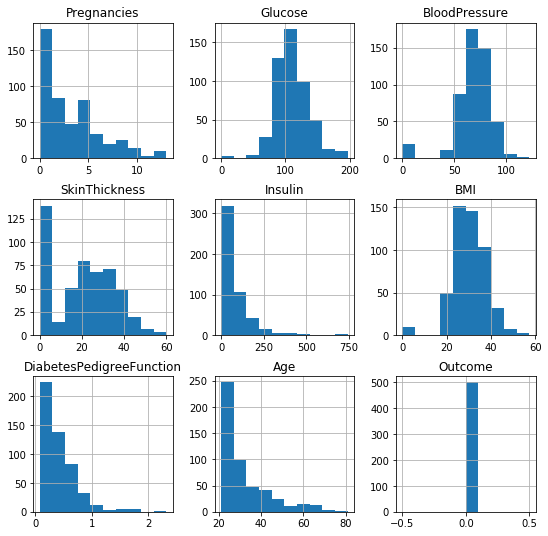

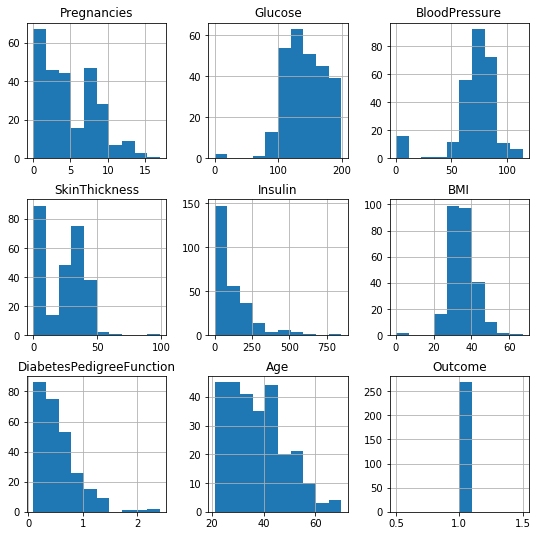

In [9]:
df.groupby('Outcome').hist(figsize=(9,9))

In [10]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [11]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### BLOOD PRESSURE

In [14]:
df[df.BloodPressure==0].shape[0]

35

In [19]:
df[df.BloodPressure==0].groupby('Outcome')['Age'].count()

Outcome
0    19
1    16
Name: Age, dtype: int64

### GLUCOSE

In [11]:
df[df.Glucose==0].shape[0]

5

In [12]:
df[df.Glucose==0].groupby('Outcome')['Age'].count()

Outcome
0    3
1    2
Name: Age, dtype: int64

### SKIN THICKNESS

In [13]:
df[df.SkinThickness==0].shape[0]

227

In [14]:
df[df.SkinThickness==0].groupby('Outcome')['Age'].count()

Outcome
0    139
1     88
Name: Age, dtype: int64

### BMI

In [15]:
df[df.BMI==0].shape[0]

11

In [16]:
df[df.BMI==0].groupby('Outcome')['Age'].count()

Outcome
0    9
1    2
Name: Age, dtype: int64

### INSULIN

In [17]:
df[df.Insulin==0].shape[0]

374

In [18]:
df[df.Insulin==0].groupby('Outcome')['Age'].count()

Outcome
0    236
1    138
Name: Age, dtype: int64

In [19]:
mod=df[(df.BloodPressure != 0) & (df.BMI != 0) & (df.Glucose != 0)]

In [20]:
mod.shape

(724, 9)

Text(0.5, 1.0, 'Insulin vs Glucose ')

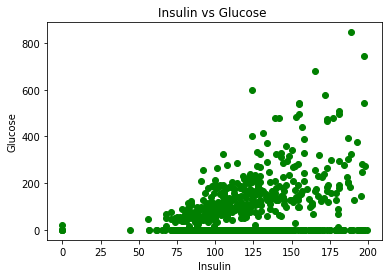

In [43]:
plt.scatter(df['Glucose'], df['Insulin'], color='green')
plt.xlabel('Insulin')
plt.ylabel('Glucose')
plt.title('Insulin vs Glucose ')

Text(0.5, 1.0, 'Age vs Glucose')

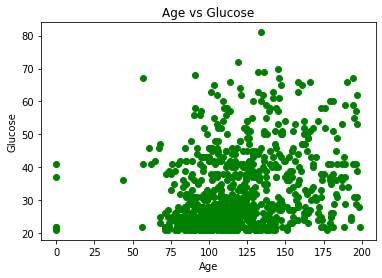

In [42]:
plt.scatter(df['Glucose'], df['Age'], color='green')
plt.xlabel('Age')
plt.ylabel('Glucose')
plt.title('Age vs Glucose')

Text(0.5, 1.0, 'Age vs BloodPressure')

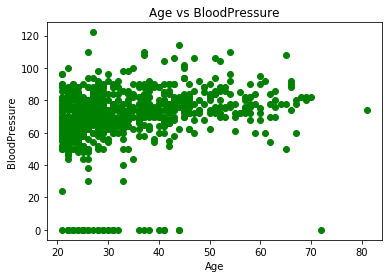

In [53]:
plt.scatter(df['Age'], df['BloodPressure'], color='green')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.title('Age vs BloodPressure')

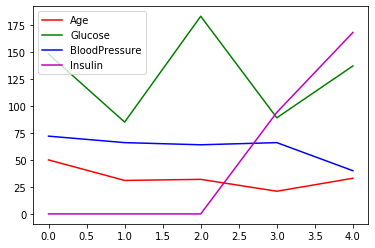

In [84]:
df.Age.head().plot(color='r', label='Age')
df.Glucose.head().plot(color='g', label='Glucose')
df.BloodPressure.head().plot(color='b', label='BloodPressure')
df.Insulin.head().plot(color='m', label='Insulin')
plt.legend()

### CORRELATION DETERMINATION

In [21]:
correlation=df.corr()['Outcome']

In [22]:
correlation

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

### Representing the Correlation in a heatmap

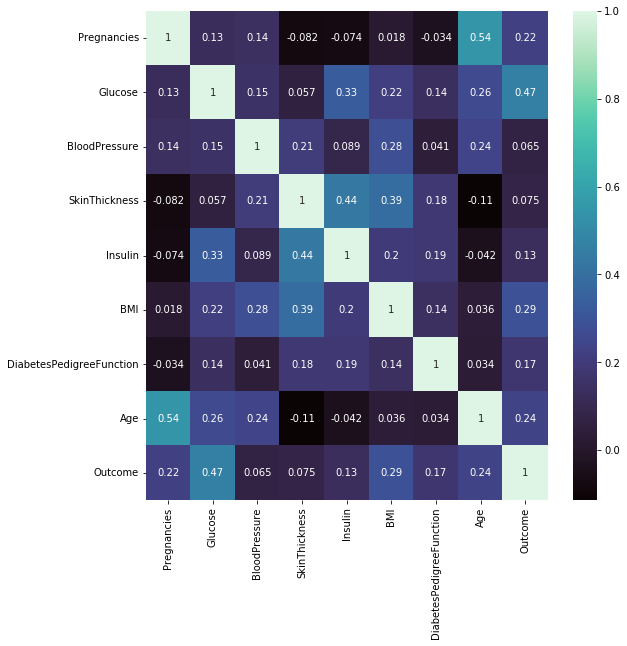

In [23]:
import seaborn as sn
plt.figure(figsize=(9,9))
sn.heatmap(df.corr(),annot=True, cmap='mako')

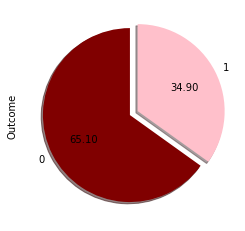

In [24]:
col=['maroon','pink']
exp=(0,0.1)
df['Outcome'].value_counts().plot(kind='pie', autopct='%.2f', shadow=True, colors=col, explode=exp, startangle=90)
plt.show()

### FEATURE ENGINEERING

In [25]:
featureset = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = mod[featureset]
y = mod.Outcome

In [26]:
#x.head()

In [27]:
#y.head()

### PERFORMING EXPLORATORY ANALYSIS

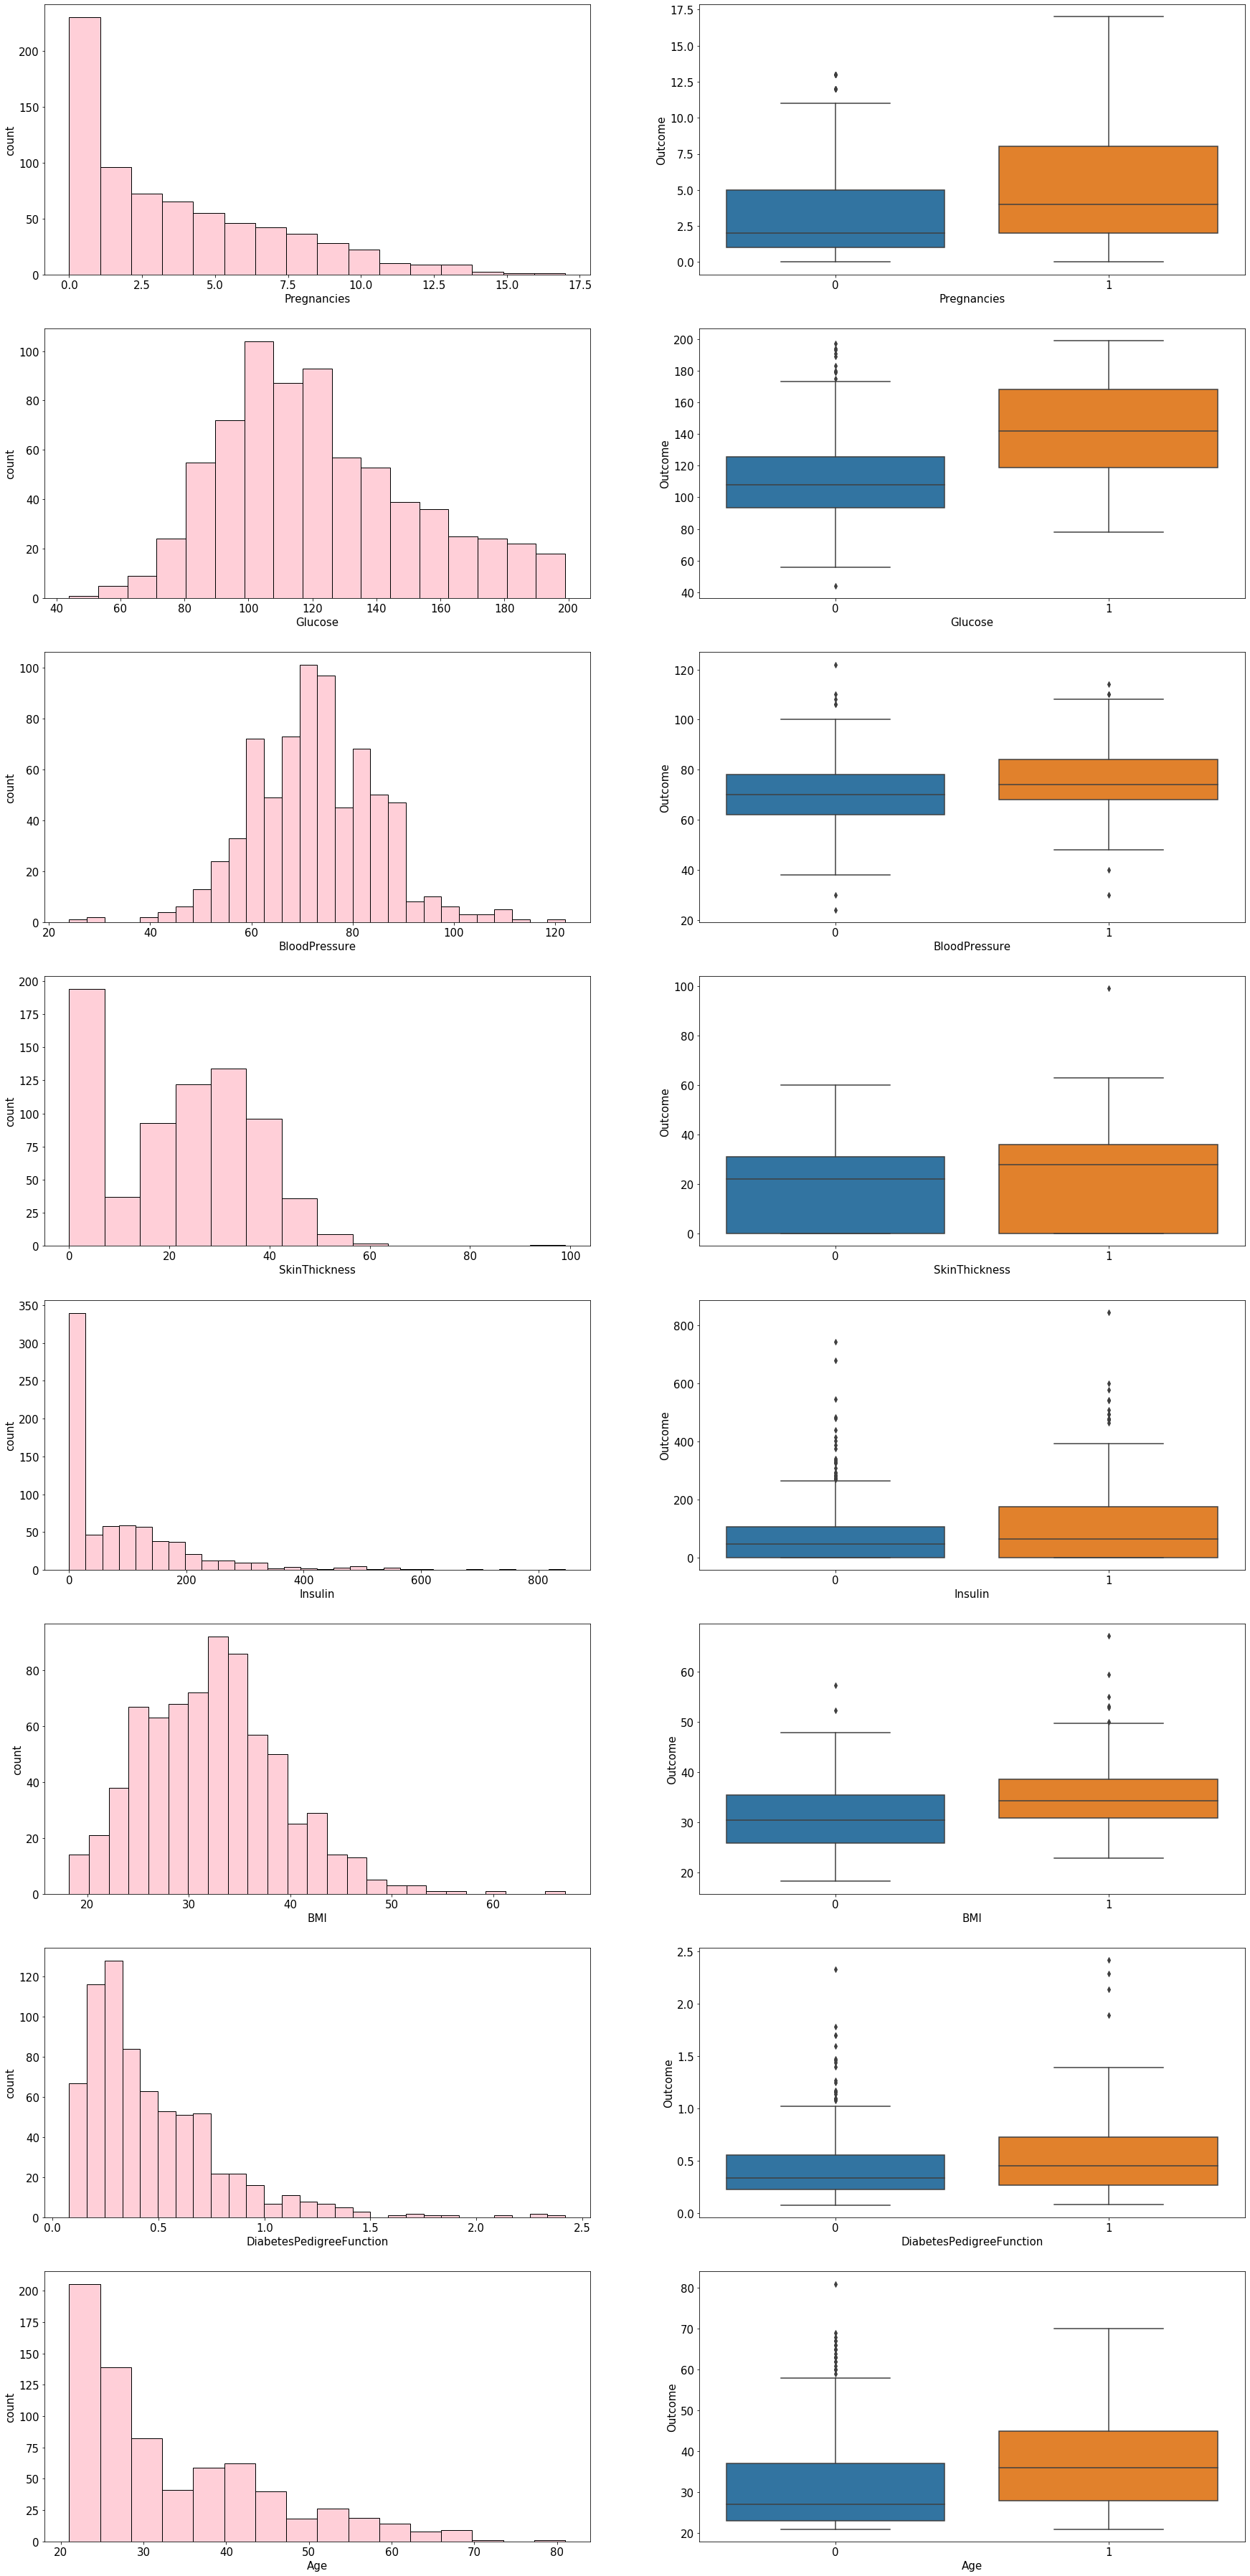

In [28]:
i=1
plt.figure(figsize=(30,90))
for col in x.columns:
    plt.subplot(11,2,i)
    sn.histplot(x[col], color='pink')
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(col, fontsize=15)
    plt.ylabel('count', fontsize=15)
    i=i+1
    plt.subplot(11,2,i)
    sn.boxplot(df['Outcome'],x[col])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Outcome',fontsize=15)
    i=i+1
plt.show()

### Splitting the Dataset into the Training Set and Test Set

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.25, random_state=0)

### Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

### SVM MODEL CONFUSION MATRIX AND SCORES

In [31]:
from sklearn.svm import SVC
#svm=SVC(gamma=5, kernel='rbf', random_state=42) # HyperParameter tuning
svm=SVC()
svm.fit(x_train,y_train)

SVC()

### Predicting a New Result

In [43]:
print('New prediction--->\n')
print(svm.predict(sc.transform([[7,150,80,40,100,40,2,70]])))
print('\n')
print('Predicting first 6 records from our diabetes dataset--->\n')
print(svm.predict(sc.transform([[6,148,72,35,0,33.6,0.627,50]])),'\n')
print(svm.predict(sc.transform([[1,85,66,29,0,26.6,0.351,31]])),'\n')
print(svm.predict(sc.transform([[8,183,64,0,0,23.3,0.672,32]])),'\n')
print(svm.predict(sc.transform([[1,89,66,23,94,28.1,0.167,21]])),'\n')
print(svm.predict(sc.transform([[0,137,40,35,168,43.1,2.288,33]])),'\n')
print(svm.predict(sc.transform([[5,116,74,0,0,25.6,0.201,30]])),'\n')
print(svm.predict(sc.transform([[3,78,50,32,88,31.0,0.248,26]])),'\n')
print(svm.predict(sc.transform([[10,115,0,0,0,35.3,0.134,29]])),'\n')
print(svm.predict(sc.transform([[2,197,70,45,543,30.5,0.158,53]])),'\n')
print(svm.predict(sc.transform([[8,125,96,0,0,0.0,0.232,54]])),'\n')
print(svm.predict(sc.transform([[4,110,92,0,0,37.6,0.191,30]])),'\n')
print(svm.predict(sc.transform([[10,168,74,0,0,38.0,0.537,34]])),'\n')
print(svm.predict(sc.transform([[10,139,80,0,0,27.1,1.441,57]])),'\n')
print(svm.predict(sc.transform([[1,189,60,23,846,30.1,0.398,59]])),'\n')


New prediction--->

[1]


Predicting first 6 records from our diabetes dataset--->

[1] 

[0] 

[1] 

[0] 

[1] 

[0] 

[0] 

[0] 

[1] 

[0] 

[0] 

[1] 

[1] 

[1] 



### Predicting the Test Set Results

In [34]:
y_pred=svm.predict(x_test)

### Making Confusion Matrix

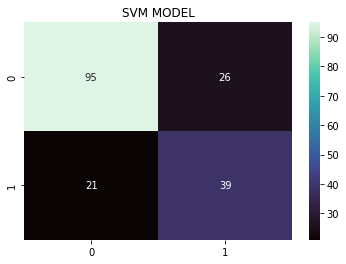

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sn
cm=confusion_matrix(y_test, y_pred)
sn.heatmap(cm, annot=True, cmap='mako')
plt.title('SVM MODEL')
acs = accuracy_score(y_test, y_pred)
pcs=precision_score(y_test, y_pred)
rcs=recall_score(y_test, y_pred)
f1s=f1_score(y_test, y_pred)

In [36]:
print('SVM ALGORITHM')
print(cm)
print('\n\n')
print('Accuracy Score: ',acs)
print('Precision Score: ',pcs)
print('Recall Score: ',rcs)
print('F1 Score: ',f1s)

SVM ALGORITHM
[[95 26]
 [21 39]]



Accuracy Score:  0.7403314917127072
Precision Score:  0.6
Recall Score:  0.65
F1 Score:  0.624


Text(0.5, 1.0, 'Predicted Outcome')

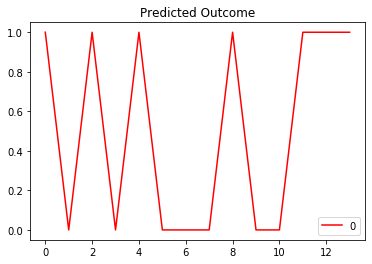

In [83]:
pred=pd.DataFrame(np.array([1,0,1,0,1,0,0,0,1,0,0,1,1,1]))
pred.plot(color='r')
plt.title('Predicted Outcome')

Text(0.5, 1.0, 'Actual Outcome')

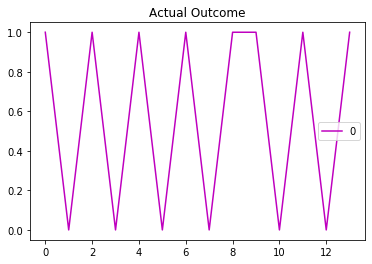

In [82]:
act=pd.DataFrame(np.array([1,0,1,0,1,0,1,0,1,1,0,1,0,1]))
act.plot(color='m')
plt.title('Actual Outcome')
